<a href="https://colab.research.google.com/github/AbdelnasserMostafa/-myproject/blob/master/Deep_Learning_A_Z_Hands_On_Artificial_Neural_Network_course_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
#plt.grid(c='grey')
plt.style.use('default')
%matplotlib inline

# Softmax classification with cross-entropy


The previous section described how to represent classification of 2 classes with the help of the logistic function . For multiclass classification there exists an extension of this logistic function called the softmax function which is used in multinomial logistic regression . What follows will explain the softmax function and how to derive it.

# Softmax function
The logistic output function described in the previous section can only be used for the classification between two target classes 
t
=
1
 and 
t
=
0
. This logistic function can be generalized to output a multiclass categorical probability distribution by the softmax function . This softmax function 
ς
 takes as input a 
C
-dimensional vector 
z
 and outputs a 
C
-dimensional vector 
y
 of real values between 
0
 and 
1
. This function is a normalized exponential and is defined as:

y
c
=
ς
(
z
)
c
=
e
z
c
∑
C
d
=
1
e
z
d
for
c
=
1
⋯
C

The denominator 
∑
C
d
=
1
e
z
d
 acts as a regularizer to make sure that 
∑
C
c
=
1
y
c
=
1
. As the output layer of a neural network, the softmax function can be represented graphically as a layer with 
C
 neurons.

We can write the probabilities that the class is 
t
=
c
 for 
c
=
1
…
C
 given input 
z
 as:

⎡
⎢
⎢
⎣
P
(
t
=
1
|
z
)
⋮
P
(
t
=
C
|
z
)
⎤
⎥
⎥
⎦
=
⎡
⎢
⎢
⎣
ς
(
z
)
1
⋮
ς
(
z
)
C
⎤
⎥
⎥
⎦
=
1
∑
C
d
=
1
e
z
d
⎡
⎢
⎢
⎣
e
z
1
⋮
e
z
C
⎤
⎥
⎥
⎦
 
 
 

Where 
P
(
t
=
c
|
z
)
 is thus the probability that that the class is 
c
 given the input 
z
.

These probabilities of the output 
P
(
t
=
1
|
z
)
 for an example system with 2 classes (
t
=
1
, 
t
=
2
) and input 
z
=
[
z
1
,
z
2
]
 are shown in the figure below. The other probability 
P
(
t
=
2
|
z
)
 will be complementary.

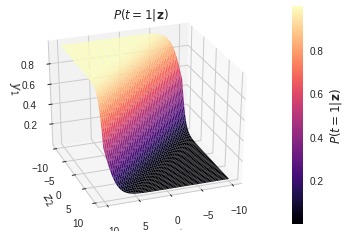

In [ ]:
# Import libraries
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm  # Colormaps
import seaborn as sns 

# Set seaborn plotting style
sns.set_style('darkgrid')

def softmax(z):  # Softmax function
  return np.exp(z) / np.sum(np.exp(z))

# Plot the softmax output for 2 dimensions for both classes
# Plot the output in function of the weights
# Define a vector of weights for which we want to plot the output

np_of_zs = 200
zs = np.linspace(-10, 10, num=np_of_zs)  # input
zs_1, zs_2 = np.meshgrid(zs, zs)         # generate grid
y = np.zeros((np_of_zs, np_of_zs, 2))    # initialize output

# Fill the output matrix for each combination of input z's
for i in range(np_of_zs):
  for j in range(np_of_zs):
    y[i, j, :] = softmax(np.asarray([zs_1[i, j], zs_2[i, j]]))
    
# Plot the loss function surfaces for both classes
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize=(6,4))
    # Plot the loss function surface for t=1
    ax = fig.gca(projection='3d')
surf = ax.plot_surface(
    zs_1, zs_2, y[:,:,0], linewidth=0, cmap=cm.magma)
ax.view_init(elev=30, azim=70)
cbar = fig.colorbar(surf)
ax.set_xlabel('$z_1$', fontsize=2)
ax.set_ylabel('$z_2$', fontsize=12)
ax.set_zlabel('$y_1$', fontsize=12)
ax.set_title ('$P(t=1|\mathbf{z})$')
cbar.ax.set_ylabel('$P(t=1|\mathbf{z})$', fontsize=12)
plt.show()

In [ ]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('Numpy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.6.7
Numpy: 1.14.6
Matplotlib: 3.0.3
Seaborn: 0.7.1


# Part 3 - Recurrent Neural Network (RNN)

In [ ]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip

--2019-03-10 06:22:26--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.100.72
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.100.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24237 (24K) [application/zip]
Saving to: ‘P16-Recurrent-Neural-Networks.zip’

P16-Recurrent-Neura 100%[===================>]  23.67K   127KB/s    in 0.2s    

2019-03-10 06:22:28 (127 KB/s) - ‘P16-Recurrent-Neural-Networks.zip’ saved [24237/24237]



In [ ]:
!unzip P16-Recurrent-Neural-Networks.zip

Archive:  P16-Recurrent-Neural-Networks.zip
   creating: Recurrent_Neural_Networks/
  inflating: Recurrent_Neural_Networks/Google_Stock_Price_Test.csv  
  inflating: Recurrent_Neural_Networks/Google_Stock_Price_Train.csv  
  inflating: Recurrent_Neural_Networks/rnn.py  


In [ ]:
!rm -rf P16-Recurrent-Neural-Networks.zip

In [ ]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Homework-Challenge.zip

--2019-03-10 06:26:03--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Homework-Challenge.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.80.56
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.80.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681041 (665K) [application/zip]
Saving to: ‘P16-Homework-Challenge.zip’

P16-Homework-Challe 100%[===================>] 665.08K   591KB/s    in 1.1s    

2019-03-10 06:26:05 (591 KB/s) - ‘P16-Homework-Challenge.zip’ saved [681041/681041]



In [ ]:
!unzip P16-Homework-Challenge.zip

Archive:  P16-Homework-Challenge.zip
   creating: Homework_Challenge/
  inflating: Homework_Challenge/rnn_20timesteps_1lstmlayers.png  
   creating: __MACOSX/
   creating: __MACOSX/Homework_Challenge/
  inflating: __MACOSX/Homework_Challenge/._rnn_20timesteps_1lstmlayers.png  
  inflating: Homework_Challenge/rnn_20timesteps_1lstmlayers.py  
  inflating: __MACOSX/Homework_Challenge/._rnn_20timesteps_1lstmlayers.py  
  inflating: Homework_Challenge/rnn_20timesteps_4lstmlayers.png  
  inflating: __MACOSX/Homework_Challenge/._rnn_20timesteps_4lstmlayers.png  
  inflating: Homework_Challenge/rnn_20timesteps_4lstmlayers.py  
  inflating: __MACOSX/Homework_Challenge/._rnn_20timesteps_4lstmlayers.py  
  inflating: Homework_Challenge/rnn_60timesteps_1lstmlayers.png  
  inflating: __MACOSX/Homework_Challenge/._rnn_60timesteps_1lstmlayers.png  
  inflating: Homework_Challenge/rnn_60timesteps_1lstmlayers.py  
  inflating: __MACOSX/Homework_Challenge/._rnn_60timesteps_1lstmlayers.py  
  inflating: 

In [ ]:
!rm -rf P16-Homework-Challenge.zip

In [ ]:
cd Recurrent_Neural_Networks/

/content/Recurrent_Neural_Networks


In [ ]:
pwd

'/content/Recurrent_Neural_Networks'

# Part - 1 - Data Preprocessing

In [ ]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set (only the training set)
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values  # 1:2 range 1 to 2 will only have 1 because colums remves

print('The following is the Training data dataset:','\n', dataset_train, '\n')
print('The following is the the Training_set (first column only): ', '\n', training_set, '\n')

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

print('The following is the SCALED training_set: ', '\n', training_set_scaled, '\n')

# Creating a data structure with 60 timesteps and 1 output (importand step for RNN)
# 20 stock days in a month x 3 is 60 days (60 timesteps)
X_train = []
y_train = []
for i in range(60, 1258):   # we have 1287 indexes
  X_train.append(training_set_scaled[i-60:i, 0])  # Choose only indexes up to firt 60
  y_train.append(training_set_scaled[i, 0])
# change them to a numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

print('The following is the y_train (stoch_prices) after converted to numpy array: ', '\n', y_train, '\n')
print('The following is the X_train (stock prices) after converted to numpy array: ', '\n', X_train, '\n')

# Reshaping the data to add more dimensionality (Unit)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print('The following is X_train after reshaped with three diminsions:')
print('X_train.shape[0] corresponds to the number of stuck prices which is columns 1 which is 0')
print('X_train.shape[1] corresponds to the number of time stamps which is [1]')
print('The third diminsion 1, corresponds to the number of indicators')
print(X_train)

The following is the Training data dataset: 
             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
5      1/10/2012  313.70  315.72  307.30  621.43   8,824,000
6      1/11/2012  310.59  313.52  309.40  624.25   4,817,800
7      1/12/2012  314.43  315.26  312.08  627.92   3,764,400
8      1/13/2012  311.96  312.30  309.37  623.28   4,631,800
9      1/17/2012  314.81  314.81  311.67  626.86   3,832,800
10     1/18/2012  312.14  315.82  309.90  631.18   5,544,000
11     1/19/2012  319.30  319.30  314.55  637.82  12,657,800
12     1/20/2012  294.16  294.40  289.76  584.39  21,231,800
13     1/23/2012  291.91  293.23  290.49  583.92   6,851,300
14     1/24/2012  292.07  292.74  287.9

# Part 2 - Building the RNN

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential  # Sequential class Creates and RNN object representing sequence of layers
from keras.layers import Dense       # Dense class to add the output layers     
from keras.layers import LSTM        # LSTM class to add the LSTM Layers (Long Short-Term Memory)
from keras.layers import Dropout     # Dropout class to add the Dropout regularization

# Initializing the RNN
regressor = Sequential()

# Adding the first LSTM and some Dropout regularization to prevent overfitting
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))  # drop rate is 20%

# in LSTM() you need to put three very importand arguments, These are:
# 1 - The number of units (the number of LSTM CELS or memory unit you want to add or the number of neurons)
# 2 - Return sequences = True, You do not have to set it to default becuase it is the default argument
# 3 - input_shape, which is the shape we created in data processing part in 3 diminsions

# Adding a second LSTM Layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True)) # No need to add input_shape after the first layer
regressor.add(Dropout(0.2))  # drop rate is 20%

# Adding a third LSTM Layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True)) # No need to add input_shape after the first layer
regressor.add(Dropout(0.2))  # drop rate is 20%

# Adding a fourth LSTM Layer and some Dropout regularization
regressor.add(LSTM(units = 50)) # No need for return_shape here, let it set to default which is False
regressor.add(Dropout(0.2))  # drop rate is 20%

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0529
Epoch 2/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0057
Epoch 5/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0053
Epoc

# Part 3 - Making the predictions and visualizing the results

The following is the real_stock_price:  
 [[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]] 


The following is the predicted_stock_prices:  
 [[791.59357]
 [788.82776]
 [789.2305 ]
 [790.76636]
 [794.155  ]
 [800.0669 ]
 [805.3747 ]
 [807.36615]
 [807.5891 ]
 [807.4164 ]
 [807.3235 ]
 [807.17316]
 [807.02496]
 [807.5515 ]
 [808.4722 ]
 [813.1476 ]
 [820.0989 ]
 [827.3894 ]
 [831.0749 ]
 [826.4271 ]] 




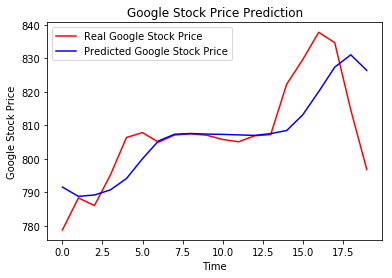

In [ ]:
# Getting the real stock prices of 2017 (read the test set only)
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

print('The following is the real_stock_price: ', '\n', real_stock_price, '\n\n')

# Getting the predicted stock price of Jan, 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):   # 60 previous input + 20 first financial days in Jan = 80
  X_test.append(inputs[i-60:i, 0])  # Choose only indexes up to firt 60
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Prediction (the results)
predicted_stock_price = regressor.predict(X_test)
# Inverse the scaling of our prediction
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

print('The following is the predicted_stock_prices: ', '\n', predicted_stock_price, '\n\n')

# Visualizing the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Evaluating the RNN

as seen in the practical lectures, the RNN we built was a regressor. Indeed, we were dealing with Regression because we were trying to predict a continuous outcome (the Google Stock Price). For Regression, the way to evaluate the model performance is with a metric called RMSE (Root Mean Squared Error). It is calculated as the root of the mean of the squared differences between the predictions and the real values.

However for our specific Stock Price Prediction problem, evaluating the model with the RMSE does not make much sense, since we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price. We want to check if our predictions follow the same directions as the real stock price and we don’t really care whether our predictions are close the real stock price. The predictions could indeed be close but often taking the opposite direction from the real stock price.

Nevertheless if you are interested in the code that computes the RMSE for our Stock Price Prediction problem, please find it just below:

import math

from sklearn.metrics import mean_squared_error
rmse = 

math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

Then consider dividing this RMSE by the range of the Google Stock Price values of January 2017 (that is around 800) to get a relative error, as opposed to an absolute error. It is more relevant since for example if you get an RMSE of 50, then this error would be very big if the stock price values ranged around 100, but it would be very small if the stock price values ranged around 10000.



# Improving the RNN

here are different ways to improve the RNN model:

1. Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.
2. Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).
3. Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.
4. Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.
5. Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.


# Tunning the RNN

you can do some Parameter Tuning on the RNN model we implemented.

Remember, this time we are dealing with a Regression problem because we predict a continuous outcome (the Google Stock Price).

Parameter Tuning for Regression is the same as Parameter Tuning for Classification which you learned in Part 1 - Artificial Neural Networks, the only difference is that you have to replace:

scoring = 'accuracy'  

by:

scoring = 'neg_mean_squared_error' 

in the GridSearchCV class parameters.

# Part 4 - Self Organizing Maps

In this part you will learn:

1. The Intuition of SOMs

2. How to build a SOM

3. How to return the specific features (like frauds) detected by the SOM

4. How to make a Hybrid Deep Learning Model


In [ ]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Self-Organizing-Maps.zip

--2019-03-12 06:38:21--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Self-Organizing-Maps.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.96.168
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.96.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17004 (17K) [application/zip]
Saving to: ‘P16-Self-Organizing-Maps.zip’

P16-Self-Organizing 100%[===================>]  16.61K  --.-KB/s    in 0s      

2019-03-12 06:38:21 (156 MB/s) - ‘P16-Self-Organizing-Maps.zip’ saved [17004/17004]



In [ ]:
!ls -la

total 40
drwxr-xr-x 1 root root  4096 Mar 12 06:38 .
drwxr-xr-x 1 root root  4096 Mar 12 06:32 ..
drwxr-xr-x 4 root root  4096 Mar  8 17:25 .config
-rw-r--r-- 1 root root 17004 Mar  6 17:49 P16-Self-Organizing-Maps.zip
drwxr-xr-x 1 root root  4096 Mar  8 17:26 sample_data


In [ ]:
!unzip P16-Self-Organizing-Maps.zip

Archive:  P16-Self-Organizing-Maps.zip
   creating: Self_Organizing_Maps/
  inflating: Self_Organizing_Maps/Credit_Card_Applications.csv  
   creating: __MACOSX/
   creating: __MACOSX/Self_Organizing_Maps/
  inflating: __MACOSX/Self_Organizing_Maps/._Credit_Card_Applications.csv  
  inflating: Self_Organizing_Maps/minisom.py  
  inflating: Self_Organizing_Maps/som.py  
  inflating: __MACOSX/Self_Organizing_Maps/._som.py  


In [ ]:
!rm -rf P16-Self-Organizing-Maps.zip

In [ ]:
!cd Self_Organizing_Maps/

In [ ]:
!cp /content/Self_Organizing_Maps/minisom.py /content

In [ ]:
!ls -la

total 36
drwxr-xr-x 1 root root  4096 Mar 12 06:38 .
drwxr-xr-x 1 root root  4096 Mar 12 06:32 ..
drwxr-xr-x 4 root root  4096 Mar  8 17:25 .config
drwxrwxr-x 3 root root  4096 Mar 31  2017 __MACOSX
-rwxr-xr-x 1 root root 10989 Mar 12 06:38 minisom.py
drwxr-xr-x 1 root root  4096 Mar  8 17:26 sample_data
drwxr-xr-x 2 root root  4096 Mar 31  2017 Self_Organizing_Maps


In [ ]:
!pwd

/content


The following the original dataset:  
      CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
5      15571121   0  15.83   0.585   2   8   8  1.500   1   1    2    0    2   
6      15726466   1  17.42   6.500   2   3   4  0.125   0   0    0    0    2   
7      15660390   0  58.67   4.460   2  11   8  3.040   1   1    6    0    2   
8      15663942   1  27.83   1.000   1   2   8  3.000   0   0    0    0    2   
9      15638610   0  55.75   7.080   2   4   8  6.750   1   1    3    1    2   
10     15644446   1  33.50   1.750   2  14   8  4.500   1   1    4    1    2   
1

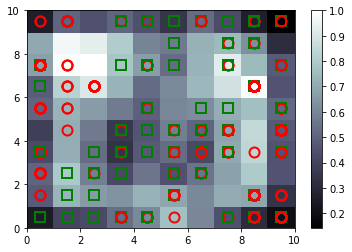

"\nmappings = som.win_map(X)\nfrauds_mapping = np.concatenate((mappings[(4, 8)],  mappings[(5, 7)]), axis = 0)\nfrauds_original_values = sc.inverse_transform(frauds)\n\nprint('The following is mappings of all the winning nodes in our SOM ', '\n', mappings, '\n')\nprint('The following is a list of all the customer that are cheated when they apply for credit ', \n      '\n', frauds_mapping, '\n')\nprint('The following is a list fo frauds with their original values after applying inverse scaling ', \n      '\n', frauds_original_values, '\n')\n"

In [ ]:
# Self Organizing Maps

# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
dataset = pd.read_csv('/content/Self_Organizing_Maps/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print('The following the original dataset: ', '\n', dataset, '\n')
print('The following the original dataset after X split: ', '\n', X, '\n')
print('The following the original dataset after y split: ', '\n', y, '\n')


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
# Fit SC object to X so SC can get all the information that has
X = sc.fit_transform(X)

print('The following is the Min and MAX of SC before fitting it to X', '\n', sc, '\n')
print('The following is X after fitting SC and transformed to X', '\n', X, '\n')

# Training the SOM (Self Orginizing Map)
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
# Train SOM on X using train_random method
som.train_random(data = X, num_iteration = 100 )

# print Self Orginizing map before training
print('The following is the Object of SOM before being trained on x and y', '\n', som, '\n')

print('The following is Visualization the SOM after being trained on x and y', '\n', som, '\n')

# Visualizing the results of SOM
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']  # o is approved and s is denied credit card
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, # 0.5 is for to put the marker in the center of the winning node
      w[1] + 0.5,
      markers[y[i]],
      markeredgecolor = colors[y[i]],
      markerfacecolor = 'None',
      markersize = 10,
      markeredgewidth = 2)
  
show()

# I am not able to execute the following code successfully becaud of frauds index changes with every execution
# Finding the frauds
'''
mappings = som.win_map(X)
frauds_mapping = np.concatenate((mappings[(4, 8)],  mappings[(5, 7)]), axis = 0)
frauds_original_values = sc.inverse_transform(frauds)

print('The following is mappings of all the winning nodes in our SOM ', '\n', mappings, '\n')
print('The following is a list of all the customer that are cheated when they apply for credit ', 
      '\n', frauds_mapping, '\n')
print('The following is a list fo frauds with their original values after applying inverse scaling ', 
      '\n', frauds_original_values, '\n')
'''

# Mega Case Study - Make a Hybrid Deep Learning Model

# Part 1 - Identify the Frauds with the Self-Organizing Map

In [ ]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Mega-Case-Study.zip

--2019-03-12 06:39:45--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Mega-Case-Study.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.96.56
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.96.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20790 (20K) [application/zip]
Saving to: ‘P16-Mega-Case-Study.zip’

P16-Mega-Case-Study 100%[===================>]  20.30K  --.-KB/s    in 0.03s   

2019-03-12 06:39:45 (687 KB/s) - ‘P16-Mega-Case-Study.zip’ saved [20790/20790]



In [ ]:
!unzip P16-Mega-Case-Study.zip

Archive:  P16-Mega-Case-Study.zip
   creating: Mega_Case_Study/
  inflating: Mega_Case_Study/.DS_Store  
   creating: __MACOSX/Mega_Case_Study/
  inflating: __MACOSX/Mega_Case_Study/._.DS_Store  
  inflating: Mega_Case_Study/ann.py  
  inflating: __MACOSX/Mega_Case_Study/._ann.py  
  inflating: Mega_Case_Study/Credit_Card_Applications.csv  
  inflating: __MACOSX/Mega_Case_Study/._Credit_Card_Applications.csv  
  inflating: Mega_Case_Study/mega_case_study.py  
  inflating: __MACOSX/Mega_Case_Study/._mega_case_study.py  
  inflating: Mega_Case_Study/minisom.py  
  inflating: Mega_Case_Study/som.py  
  inflating: __MACOSX/Mega_Case_Study/._som.py  


In [ ]:
!rm -rf P16-Mega-Case-Study.zip

In [ ]:
!ls - Mega_Case_Study/

In [ ]:
!ls -la /content/Mega_Case_Study/

total 76
drwxr-xr-x 2 root root  4096 Apr 21  2017 .
drwxr-xr-x 1 root root  4096 Mar 12 06:39 ..
-rw-r--r-- 1 root root  2293 Apr  7  2017 ann.py
-rw-r--r-- 1 root root 35641 Feb 20  2017 Credit_Card_Applications.csv
-rw-r--r-- 1 root root  6148 Apr 21  2017 .DS_Store
-rw-r--r-- 1 root root  2578 Apr  9  2017 mega_case_study.py
-rwxr-xr-x 1 root root 10989 Nov  5  2016 minisom.py
-rw-r--r-- 1 root root  1173 Mar  7  2017 som.py


In [ ]:
!cp /content/Mega_Case_Study/mega_case_study.py

cp: missing destination file operand after '/content/Mega_Case_Study/mega_case_study.py'
Try 'cp --help' for more information.


In [ ]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Self-Organizing-Maps.zip

--2019-03-12 06:41:42--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Self-Organizing-Maps.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.84.56
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.84.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17004 (17K) [application/zip]
Saving to: ‘P16-Self-Organizing-Maps.zip’

P16-Self-Organizing 100%[===================>]  16.61K  --.-KB/s    in 0s      

2019-03-12 06:41:42 (49.7 MB/s) - ‘P16-Self-Organizing-Maps.zip’ saved [17004/17004]



In [ ]:
!unzip P16-Self-Organizing-Maps.zip

Archive:  P16-Self-Organizing-Maps.zip
replace Self_Organizing_Maps/Credit_Card_Applications.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Self_Organizing_Maps/Credit_Card_Applications.csv  
  inflating: __MACOSX/Self_Organizing_Maps/._Credit_Card_Applications.csv  
  inflating: Self_Organizing_Maps/minisom.py  
  inflating: Self_Organizing_Maps/som.py  
  inflating: __MACOSX/Self_Organizing_Maps/._som.py  


In [ ]:
!rm -rf P16-Self-Organizing-Maps.zip

The following the original dataset:  
      CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
5      15571121   0  15.83   0.585   2   8   8  1.500   1   1    2    0    2   
6      15726466   1  17.42   6.500   2   3   4  0.125   0   0    0    0    2   
7      15660390   0  58.67   4.460   2  11   8  3.040   1   1    6    0    2   
8      15663942   1  27.83   1.000   1   2   8  3.000   0   0    0    0    2   
9      15638610   0  55.75   7.080   2   4   8  6.750   1   1    3    1    2   
10     15644446   1  33.50   1.750   2  14   8  4.500   1   1    4    1    2   
1

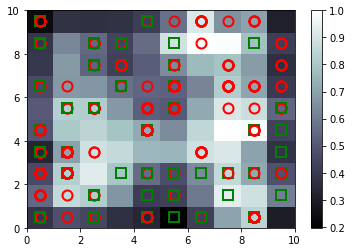

In [ ]:
# Self Organizing Maps

# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
dataset = pd.read_csv('/content/Self_Organizing_Maps/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print('The following the original dataset: ', '\n', dataset, '\n')
print('The following the original dataset after X split: ', '\n', X, '\n')
print('The following the original dataset after y split: ', '\n', y, '\n')


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
# Fit SC object to X so SC can get all the information that has
X = sc.fit_transform(X)

print('The following is the Min and MAX of SC before fitting it to X', '\n', sc, '\n')
print('The following is X after fitting SC and transformed to X', '\n', X, '\n')

# Training the SOM (Self Orginizing Map)
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
# Train SOM on X using train_random method
som.train_random(data = X, num_iteration = 100 )

# print Self Orginizing map before training
print('The following is the Object of SOM before being trained on x and y', '\n', som, '\n')

print('The following is Visualization the SOM after being trained on x and y', '\n', som, '\n')

# Visualizing the results of SOM
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']  # o is approved and s is denied credit card
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, # 0.5 is for to put the marker in the center of the winning node
      w[1] + 0.5,
      markers[y[i]],
      markeredgecolor = colors[y[i]],
      markerfacecolor = 'None',
      markersize = 10,
      markeredgewidth = 2)
  
show()

In [ ]:
# Finding the Frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8, 5)],  mappings[(8, 9)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [ ]:
print('The following are the cheaters in Credit card application:', '\n',frauds, '\n')

The following are the cheaters in Credit card application: 
 [[1.5717700e+07 0.0000000e+00 2.3580000e+01 8.3000000e-01 2.0000000e+00
  1.1000000e+01 4.0000000e+00 4.1500000e-01 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 2.0000000e+00 2.0000000e+02 1.2000000e+01]
 [1.5716082e+07 0.0000000e+00 2.2250000e+01 1.2500000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 3.2500000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.8000000e+02 1.0000000e+00]
 [1.5752344e+07 0.0000000e+00 2.1080000e+01 5.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5779207e+07 0.0000000e+00 2.7330000e+01 1.6650000e+00 2.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 3.4000000e+02 2.0000000e+00]
 [1.5611409e+07 0.0000000e+00 2.3580000e+01 5.8500000e-01 1.0000000e+00

# Part 2 - Going from Unsupervised to Supervised Deep Learning

In [ ]:
# Creating the matrix of features

# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

# Creating the dependents variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1
    
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

# Importing the keras libraries packages
from keras.models import Sequential
from keras.layers import Dense

# initializing the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training net
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
690/690 [==============================] - 5s 8ms/step - loss: 0.4404 - acc: 0.9913
Epoch 2/2
690/690 [==============================] - 3s 4ms/step - loss: 0.1064 - acc: 0.9928


# Part 3 - Making predictions and evaluating the model

In [ ]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
print('The following is the model probabilities prediction of frauds', '\n', y_pred, '\n')

# printing a 2D array of 2 columns (the first is the customer ID, and the second is the predicted probabilities )
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
print('The following is a concatenated 2D array of CustomerID and its predicted Probability', '\n', y_pred, '\n')

# Sorting the customers by their predicted probabilities of cheaters
y_pred = y_pred[y_pred[:, 1].argsort()]
print('The following is sorted list of the customers cheated: ', '\n', y_pred, '\n')


The following is the model probabilities prediction of frauds 
 [[0.03140417]
 [0.03594714]
 [0.03883782]
 [0.06560621]
 [0.0420332 ]
 [0.04656744]
 [0.02929938]
 [0.02352315]
 [0.04145712]
 [0.05091569]
 [0.02252764]
 [0.0261457 ]
 [0.04595432]
 [0.0172618 ]
 [0.0238162 ]
 [0.04775602]
 [0.03792891]
 [0.05793041]
 [0.03543207]
 [0.04105765]
 [0.03703833]
 [0.04269814]
 [0.02606943]
 [0.03046727]
 [0.03235957]
 [0.02075464]
 [0.03510454]
 [0.0555847 ]
 [0.04881212]
 [0.03609172]
 [0.03553104]
 [0.03590608]
 [0.05237967]
 [0.02806976]
 [0.05917007]
 [0.05326027]
 [0.19863617]
 [0.02536604]
 [0.02855557]
 [0.027771  ]
 [0.03898102]
 [0.02924928]
 [0.04592282]
 [0.03169051]
 [0.04222789]
 [0.03592637]
 [0.04335788]
 [0.03455451]
 [0.04526782]
 [0.02718675]
 [0.02274814]
 [0.0342536 ]
 [0.0437842 ]
 [0.03270751]
 [0.04623955]
 [0.03951788]
 [0.04021484]
 [0.0322291 ]
 [0.06173626]
 [0.03123486]
 [0.02455097]
 [0.03090572]
 [0.06064796]
 [0.02762055]
 [0.05713999]
 [0.01716769]
 [0.02714884

# Boltzmann Machines

In this part you will learn:

the Intuition of Boltzmann Machines
how to build a Boltzmann Machine
Boltzmann Machines can be seen from two different points of view:

1. An Energy-Based Model
2. A Probabilistic Graphical Model

In the Intuition Lectures Kirill will focus more on the Energy-Based Model point of view, and then for the Practical Lectures we will focus more on the Probabilistic Graphical Model point of view.

In these last two parts (Part 5 - Boltzmann Machines and Part 6 - AutoEncoders) of this course, we will create two types of Recommender Systems:

1. One that predicts binary ratings "Like" or "Not Like". We will build it in this Part 5 with a Boltzmann Machine.
2. Another one that predicts ratings from 1 to 5. We will build it in Part 6 with an AutoEncoder.

We will implement these two Deep Learning models with PyTorch, a highly advanced Deep Learning platform more powerful than Keras. Every single line of code will be explained in details but I would recommend to have a first look at the PyTorch documentation to start getting familiar with PyTorch:

PyTorch Documentation Here:  https://pytorch.org/docs/0.3.1/


In [ ]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Boltzmann-Machines.zip

--2019-03-13 05:12:08--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Boltzmann-Machines.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.80.208
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.80.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23195800 (22M) [application/zip]
Saving to: ‘P16-Boltzmann-Machines.zip’

P16-Boltzmann-Machi 100%[===================>]  22.12M  67.6MB/s    in 0.3s    

2019-03-13 05:12:08 (67.6 MB/s) - ‘P16-Boltzmann-Machines.zip’ saved [23195800/23195800]



In [ ]:
!ls -la

total 22676
drwxr-xr-x 1 root root     4096 Mar 13 05:12 .
drwxr-xr-x 1 root root     4096 Mar 13 04:15 ..
drwxr-xr-x 4 root root     4096 Mar  8 17:25 .config
-rw-r--r-- 1 root root 23195800 Mar  6 17:45 P16-Boltzmann-Machines.zip
drwxr-xr-x 1 root root     4096 Mar  8 17:26 sample_data


In [ ]:
!unzip P16-Boltzmann-Machines.zip

Archive:  P16-Boltzmann-Machines.zip
   creating: Boltzmann_Machines/
  inflating: Boltzmann_Machines/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/Boltzmann_Machines/
  inflating: __MACOSX/Boltzmann_Machines/._.DS_Store  
  inflating: Boltzmann_Machines/AItRBM-proof.pdf  
  inflating: __MACOSX/Boltzmann_Machines/._AItRBM-proof.pdf  
   creating: Boltzmann_Machines/ml-100k/
  inflating: Boltzmann_Machines/ml-100k/allbut.pl  
   creating: __MACOSX/Boltzmann_Machines/ml-100k/
  inflating: __MACOSX/Boltzmann_Machines/ml-100k/._allbut.pl  
  inflating: Boltzmann_Machines/ml-100k/mku.sh  
  inflating: __MACOSX/Boltzmann_Machines/ml-100k/._mku.sh  
  inflating: Boltzmann_Machines/ml-100k/README  
  inflating: Boltzmann_Machines/ml-100k/u.data  
  inflating: __MACOSX/Boltzmann_Machines/ml-100k/._u.data  
  inflating: Boltzmann_Machines/ml-100k/u.genre  
  inflating: __MACOSX/Boltzmann_Machines/ml-100k/._u.genre  
  inflating: Boltzmann_Machines/ml-100k/u.info  
  inflating: __MACOS

In [ ]:
!rm -rf P16-Boltzmann-Machines.zip

In [ ]:
!cd Boltzmann_Machines/

/content


# Boltzmann Machines

In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2019-03-30 05:10:24--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  3.46MB/s    in 1.4s    

2019-03-30 05:10:26 (3.46 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-1m.zip

--2019-03-30 05:10:32--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  4.13MB/s    in 1.4s    

2019-03-30 05:10:33 (4.13 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]



In [ ]:
ls -la

total 10612
drwxr-xr-x 1 root root    4096 Mar 30 05:10 ./
drwxr-xr-x 1 root root    4096 Mar 30 05:00 ../
drwxr-xr-x 1 root root    4096 Mar 27 20:25 .config/
-rw-r--r-- 1 root root 4924029 Jan 29  2016 ml-100k.zip
-rw-r--r-- 1 root root 5917549 Jan 29  2016 ml-1m.zip
drwxr-xr-x 1 root root    4096 Mar 27 20:26 sample_data/


In [ ]:
!unzip ml-100k.zip

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [ ]:

!ls -la

total 10616
drwxr-xr-x 1 root root    4096 Mar 30 05:10 .
drwxr-xr-x 1 root root    4096 Mar 30 05:00 ..
drwxr-xr-x 1 root root    4096 Mar 27 20:25 .config
drwxr-x--- 2 root root    4096 Jan 29  2016 ml-100k
-rw-r--r-- 1 root root 4924029 Jan 29  2016 ml-100k.zip
-rw-r--r-- 1 root root 5917549 Jan 29  2016 ml-1m.zip
drwxr-xr-x 1 root root    4096 Mar 27 20:26 sample_data


In [ ]:
!unzip ml-1m.zip

Archive:  ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         


In [ ]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

|INFO|google.colab serverextension initialized.
|INFO|Serving notebooks from local directory: /content
|INFO|0 active kernels
|INFO|The Jupyter Notebook is running at:
|INFO|http://localhost:8888/
|INFO|Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
|CRITICAL|received signal 2, stopping
|INFO|Shutting down 0 kernels


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
from torch.autograd import Variable

# Importing the dataset
movies = pd.read_csv('/content/ml-1m/movies.dat', sep = '::', 
                     header = None, engine = 'python', encoding = 'latin-1')
users = pd.read_csv('/content/ml-1m/users.dat', sep = '::', 
                     header = None, engine = 'python', encoding = 'latin-1')
ratings = pd.read_csv('/content/ml-1m/ratings.dat', sep = '::', 
                     header = None, engine = 'python', encoding = 'latin-1')

#print('The folloing is the original movies dataset', '\n', movies, '\n')
#print('The folloing is the original users dataset', '\n', users, '\n')
#print('The folloing is the original rating dataset', '\n', ratings, '\n')

# Preparing the training set and the test set
training_set = pd.read_csv('/content/ml-100k/u1.base', delimiter = '\t')
test_set = pd.read_csv('/content/ml-100k/u1.test', delimiter = '\t')

#print('The folloing is the taining dataset before converted to an array', '\n', training_set, '\n')
#print('The folloing is the taining dataset before converted to an array', '\n', test_set, '\n')

# Convert the training_set and test_set to array
training_set = np.array(training_set, dtype = 'int')
test_set = np.array(test_set, dtype = 'int')

#print('The folloing is the taining dataset after being converted to an array', '\n', training_set, '\n')
#print('The folloing is the test dataset after being converted to an array', '\n', test_set, '\n')

# Getting the number of users and movies to have the same numbers of users to match the numbers
# of training_set matrix and test_set matrix to have the same numbers of rows and columns
nb_users = int(max(max(training_set[:, 0]), max(test_set[:, 0])))
nb_movies = int(max(max(training_set[:, 1]), max(test_set[:, 1])))

#print('The following is the Total number of users (all the rows in col 1 ): ', '\n', nb_users, '\n')
#print('The following is the Total number of users (all the rows in col 2 ): ', '\n', nb_movies, '\n')

# Converting the data into an array with users in lines and movies in columns
def convert(data):
  
  # Create an array where the rows are going to be the users and the columns will be the movies
  # Create a list of lists (several list, one list for each line. That is one list for each users, 943 lists)
  # Whate we will get from each users? The rating of 1682 movies for corresponding users
  
  new_data = []  # initialize the lis
  for id_users in range(1, nb_users + 1):  # to get to up to 943 users
    id_movies = data[:, 1][data[:, 0] == id_users]
    id_ratings = data[:, 2][data[:, 0] == id_users]
    ratings = np.zeros(nb_movies)
    ratings[id_movies - 1] = id_ratings
    new_data.append(list(ratings))
  return new_data

training_set = convert(training_set)
test_set = convert(test_set)
print(training_set, '\n')
print(test_set)

    # data[:, 1] Takes the whole columns of the movies ID from the training_set index 1 (2nd colums)
    # [data[:, 0] == id_users]  Condition that takes all the movies IDs where the first user equat 1
    # id_ratings = data[:, 2][data[:, 0] == id_users]  Gets all the rating for that same user (index 2)
    # ratings = np.zeros(nb_movies) Initialize a list of 1682 users elements and set them to a list of zeros (1682 zeros)
    # ratings[id_movies - 1] = id_ratings replaces the rating for the movies that the users rated, -1 is to start from 
    # the first index 0 and  = id_ratings is to get all the REAL rating into ratings[id_movies - 1]
    # new_data.append(list(ratings)) appends this list of rating corresponding to one user "rating[id_movies - 1]" 
    # to new_data = [] which contains all the raings for all users.
    
    # training_set = convert(training_set) # Applies the original training set and converted to the new_dataset
    # test_set = convert(test_set) # Applies the original training set and converted to the new_dataset
    
# Converting the data into Torch tensors
training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

# Converting the ratings inot binary ratings 1 (liked) or 0 (Not Liked)
training_set[training_set == 0] = -1
training_set[training_set == 1] = 0
training_set[training_set == 2] = 0
training_set[training_set >= 3] = 1
test_set[test_set == 0] = -1
test_set[test_set == 1] = 0
test_set[test_set == 2] = 0
test_set[test_set >= 3] = 1

# Creating the architecture of the Neural Network
class RBM():
  def __init__(self, nv, nh):
    self.W = torch.randn(nh, nv)
    self.a = torch.randn(1, nh)
    self.b = torch.randn(1, nv)
  def sample_h(self, x):
    wx = torch.mm(x, self.W.t())
    activation = wx + self.a.expand_as(wx)
    p_h_given_v = torch.sigmoid(activation)
    return p_h_given_v, torch.bernoulli(p_h_given_v)
  def sample_v(self, y):
    wy = torch.mm(y, self.W)
    activation = wy + self.b.expand_as(wy)
    p_v_given_h = torch.sigmoid(activation)
    return p_v_given_h, torch.bernoulli(p_v_given_h)
  def train(self, v0, vk, ph0, phk):
    self.W += torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)
    self.b += torch.sum((v0 - vk), 0)
    self.a += torch.sum((ph0 - phk), 0)

nv = len(training_set[0])
nh = 100
batch_size = 100
rbm = RBM(nv, nh)

# Training the RBM
nb_epoch = 10
for epoch in range(1, nb_epoch + 1):
    train_loss = 0
    s = 0.
    for id_user in range(0, nb_users - batch_size, batch_size):
        vk = training_set[id_user:id_user+batch_size]
        v0 = training_set[id_user:id_user+batch_size]
        ph0,_ = rbm.sample_h(v0)
        for k in range(10):
            _,hk = rbm.sample_h(vk)
            _,vk = rbm.sample_v(hk)
            vk[v0<0] = v0[v0<0]
        phk,_ = rbm.sample_h(vk)
        rbm.train(v0, vk, ph0, phk)
        train_loss += np.sqrt(torch.mean((v0[v0>=0] - vk[v0>=0])**2)) # RMSE here
        s += 1.
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))
  
# Testing the RBM
test_loss = 0
s = 0.
for id_user in range(nb_users):
    v = training_set[id_user:id_user+1]
    vt = test_set[id_user:id_user+1]
    if len(vt[vt>=0]) > 0:
        _,h = rbm.sample_h(v)
        _,v = rbm.sample_v(h)
        test_loss += np.sqrt(torch.mean((vt[vt>=0] - v[vt>=0])**2)) # RMSE here
        s += 1.
print('test loss: '+str(test_loss/s))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



RuntimeError: ignored

In [ ]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 Mar 27 20:26 .
drwxr-xr-x 1 root root 4096 Mar 30 05:00 ..
drwxr-xr-x 1 root root 4096 Mar 27 20:25 .config
drwxr-xr-x 1 root root 4096 Mar 27 20:26 sample_data
